# Импорт

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.gridspec as gridspec
import joblib
# omsky_gamedev

# Загрузка датасета для регрессии.

In [22]:
models = pd.read_csv('../../Data/energy_task_moded.csv')
models

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,year,time
0,60.0,30.0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,6.60,733.5,92.000000,7.000000,63.000000,5.3,11.0,1.0,2016.0,1020.0
1,60.0,30.0,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.48,733.6,92.000000,6.666667,59.166667,5.2,11.0,1.0,2016.0,1030.0
2,50.0,30.0,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.37,733.7,92.000000,6.333333,55.333333,5.1,11.0,1.0,2016.0,1040.0
3,50.0,40.0,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.25,733.8,92.000000,6.000000,51.500000,5.0,11.0,1.0,2016.0,1050.0
4,60.0,40.0,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,6.13,733.9,92.000000,5.666667,47.666667,4.9,11.0,1.0,2016.0,1060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100.0,0.0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,22.70,755.2,55.666667,3.333333,23.666667,13.3,27.0,5.0,2016.0,1040.0
19731,90.0,0.0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,22.60,755.2,56.000000,3.500000,24.500000,13.3,27.0,5.0,2016.0,1050.0
19732,270.0,10.0,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,22.50,755.2,56.333333,3.666667,25.333333,13.3,27.0,5.0,2016.0,1060.0
19733,420.0,10.0,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,22.30,755.2,56.666667,3.833333,26.166667,13.2,27.0,5.0,2016.0,1070.0


# Разбиваем на выборку

In [23]:
X_train, X_test, y_train, y_test = train_test_split(models.drop('Appliances', axis=1), models['Appliances'], test_size=0.5)


# <b>Линейная регресия</b>

## Обычная линейная регресия (без гиппер параметра).

### Обуение

In [24]:
line_regression_classic = LinearRegression().fit(X_train, y_train)
line_regression_classic.predict(X_test)

array([ 59.76974911, 126.58408722, 105.18474913, ...,  92.09272525,
        58.05672923, 108.57400564])

### Значения ошибок: <br>
- средней абсолютной ошибки;
- средней квадраттичной ошибки (MSE);
- средней квадраттичной ошибки под корнем (RMSE);
- средней абсолютной процентной ошибки;

In [25]:
y_predicted = line_regression_classic.predict(X_test)
line_regression_classic_errors = {'MAE': mean_absolute_error(y_predicted, y_test), 
                          'RMSE': mean_squared_error(y_predicted, y_test),
                          'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                          'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                          'R^2': line_regression_classic.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_predicted, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted, y_test)}',
      f'MSE: {mean_squared_error(y_predicted, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted, y_test)}',
      f'R^2: {line_regression_classic.score(X_test, y_test)}',
      sep='\n')


MAE: 53.57473970718654
RMSE: 9128.720354384184
MSE: 95.54433711311302
MAPE: 0.6130715487654562
R^2: 0.15279624514094126


### Значение весов.

In [26]:
print(len(line_regression_classic.coef_), line_regression_classic.coef_, sep='\n')


29
[ 1.81963610e+00 -6.97282383e+00  1.33384761e+01 -1.53738115e+01
 -1.09981785e+01  2.85230504e+01  3.77541974e+00 -1.72399339e+00
 -9.14746938e-01 -6.56013964e-01 -8.47263244e-02  6.57071521e+00
  2.44217443e-02  3.85838922e+00 -1.97997048e+00  7.77328987e+00
 -3.04389147e+00 -1.39371163e+01 -8.92700595e-01 -4.13997903e+00
 -6.41926410e-02  2.76871658e-01  1.42433213e+00  1.64728949e-01
 -9.61831201e-01 -2.86836859e-01 -1.22634026e+01  0.00000000e+00
  1.75319850e-02]


### Предварительные результаты

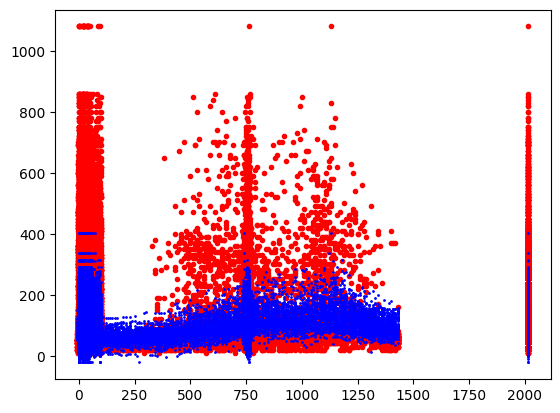

In [27]:
plt.plot(X_test, y_test, 'ro', markersize=3)
plt.plot(X_test, line_regression_classic.predict(X_test), 'bo', markersize=1)

## Ridge (линейная регрессия + L1)

### Ridge - подборка гиппер параметра $\alpha$

In [28]:
ridge_optimal_for_line_regression = GridSearchCV(Ridge(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
ridge_optimal_for_line_regression.best_params_

{'alpha': 52}

In [29]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    ridge_optimal_for_line_regression = GridSearchCV(Ridge(), {'alpha': np.arange(a, b, i)}).fit(X_train, y_train)
    if (ridge_optimal_for_line_regression.best_params_['alpha'] == 0):
        break
    elif (ridge_optimal_for_line_regression.best_params_['alpha'] != b):
        a = ridge_optimal_for_line_regression.best_params_['alpha']-i
        b = ridge_optimal_for_line_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

ridge_optimal_for_line_regression.best_params_['alpha']  


    

52.194999999999965

### Ridge - обучение с подобранным гиппер параметрам $\alpha$

In [30]:
line_regression_ridge = Ridge(alpha=ridge_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
y_result = line_regression_ridge.predict(X_test)
line_regression_ridge_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                                'RMSE': mean_squared_error(y_predicted, y_test),
                                'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                                'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                                'R^2': line_regression_classic.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_result, y_test)}",
      f'RMSE: {mean_squared_error(y_result, y_test)}',
      f'MSE: {mean_squared_error(y_result, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_result, y_test)}',
      f'R^2: {ridge_optimal_for_line_regression.score(X_test, y_test)}',
      sep='\n')
line_regression_ridge.coef_

MAE: 53.530347643825735
RMSE: 9126.42260392649
MSE: 95.53231183179066
MAPE: 0.6245491955293551
R^2: 0.15300949110969864


array([ 1.82770197e+00, -6.75578007e+00,  1.32159170e+01, -1.49616371e+01,
       -1.07994612e+01,  2.80046488e+01,  3.80497602e+00, -1.85515162e+00,
       -9.66173029e-01, -7.89827793e-01, -8.44456819e-02,  6.49991149e+00,
        2.94656699e-02,  3.65081256e+00, -1.98107455e+00,  7.63417485e+00,
       -3.03171556e+00, -1.34563645e+01, -8.65372715e-01, -4.10260962e+00,
       -6.77433616e-02,  2.60775984e-01,  1.42913907e+00,  1.64225200e-01,
       -1.00374187e+00, -2.69395718e-01, -1.17892520e+01,  0.00000000e+00,
        1.76064464e-02])

## Lasso (линейная регрессия + L2)

### Lasso - подборка гиппер параметра $\alpha$

In [31]:
lasso_optimal_for_line_regression = GridSearchCV(Lasso(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
lasso_optimal_for_line_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.313e+07, tolerance: 8.069e+03 Linear regression models with null weight for the l1 regularization term are more

{'alpha': 0}

In [32]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    lasso_optimal_for_line_regression = GridSearchCV(Lasso(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
    if (lasso_optimal_for_line_regression.best_params_['alpha'] == 0):
        break
    elif (lasso_optimal_for_line_regression.best_params_['alpha'] != b):
        a = lasso_optimal_for_line_regression.best_params_['alpha']-i
        b = lasso_optimal_for_line_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

lasso_optimal_for_line_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.313e+07, tolerance: 8.069e+03 Linear regression models with null weight for the l1 regularization term are more

{'alpha': 0}

### Lasso - обучение с подобранным гиппер параметрам $\alpha$

In [33]:
line_regression_lasso = Lasso(alpha=lasso_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
y_predict = line_regression_lasso.predict(X_test)
line_regression_lasso_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                               'RMSE': mean_squared_error(y_predicted, y_test),
                               'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                               'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                               'R^2': line_regression_lasso.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_predict, y_test)}",
      f'RMSE: {mean_squared_error(y_predict, y_test)}',
      f'MSE: {mean_squared_error(y_predict, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predict, y_test)}',
      f'R^2: {line_regression_lasso.score(X_test, y_test)}',
      sep='\n')
line_regression_lasso.coef_

C:\Users\Mike\AppData\Local\Temp\ipykernel_6352\3665724445.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  line_regression_lasso = Lasso(alpha=lasso_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.153e+07, tolerance: 1.011e+04 Linear regression models with null weight for the l1 regularization term

MAE: 53.57473970718466
RMSE: 9128.720354384075
MSE: 95.54433711311243
MAPE: 0.6130715487670698
R^2: 0.15279624514095136


array([ 1.81963610e+00, -6.97282383e+00,  1.33384761e+01, -1.53738115e+01,
       -1.09981785e+01,  2.85230504e+01,  3.77541974e+00, -1.72399339e+00,
       -9.14746938e-01, -6.56013964e-01, -8.47263244e-02,  6.57071521e+00,
        2.44217443e-02,  3.85838922e+00, -1.97997048e+00,  7.77328987e+00,
       -3.04389147e+00, -1.39371163e+01, -8.92700595e-01, -4.13997903e+00,
       -6.41926410e-02,  2.76871658e-01,  1.42433213e+00,  1.64728949e-01,
       -9.61831201e-01, -2.86836859e-01, -1.22634026e+01,  0.00000000e+00,
        1.75319850e-02])

# Save Models

In [34]:
joblib.dump(line_regression_classic, '../../Pipelines/Laba1/LineRegressions/LineRegressionClassicModel.sav')
joblib.dump(line_regression_ridge, '../../Pipelines/Laba1/LineRegressions/LineRegressionRidgeModel.sav')
joblib.dump(line_regression_lasso, '../../Pipelines/Laba1/LineRegressions/LineRegressionLassoModel.sav')


['../../Pipelines/Laba1/LineRegressions/LineRegressionLassoModel.sav']